In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)


In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Set up the inspector
inspector = inspect(engine)

In [16]:
# Find the column headers for each table
columnsm = inspector.get_columns('measurement')
for column in columnsm:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
columnss = inspector.get_columns('station')
for column in columnss:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0, 0.5, 'Inches')

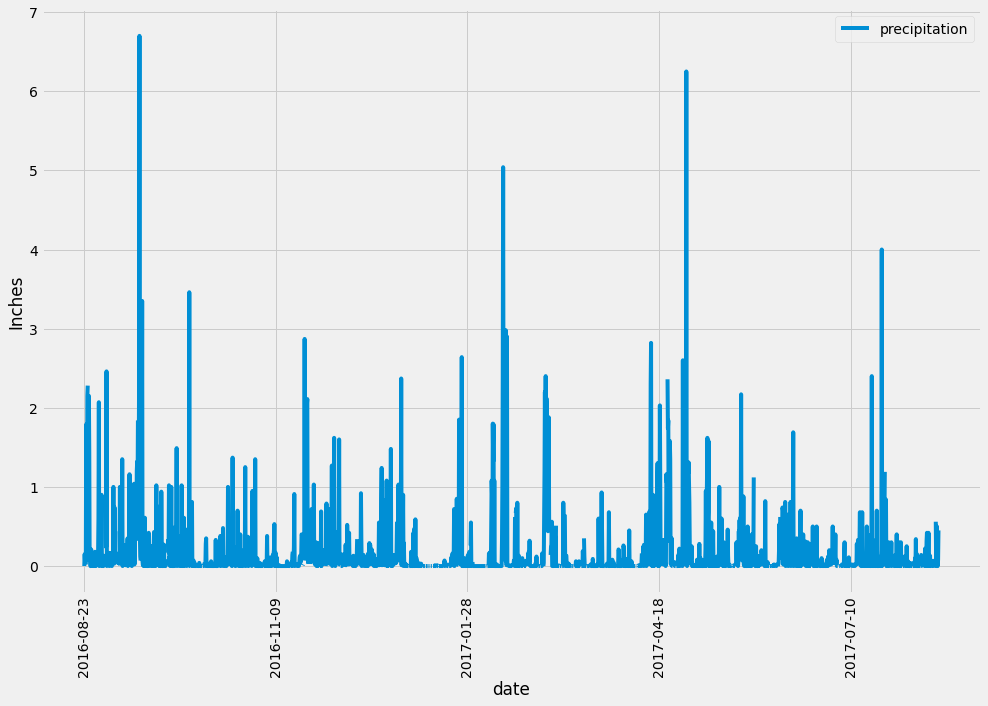

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
response = session.query(Measure.date, Measure.prcp).order_by(Measure.date).filter(Measure.date >= '2016-08-23').all()
response

listy = []
for row in response:
    listy.append(row)

measure_df = pd.DataFrame(listy, columns = ['date', 'precipitation'])
measure_df

# Use Pandas Plotting with Matplotlib to plot the data
measure_df.plot(x = 'date', y = 'precipitation', rot = 90, figsize = (15,10))
plt.ylabel('Inches')

In [40]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measure_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [77]:
# Design a query to show how many stations are available in this dataset?
count = session.query(func.count(Measure.station)).group_by(Measure.station).count()
count

9

In [82]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activity = session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).\
    order_by(func.count(Measure.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
low_temp = session.query(func.min(Measure.tobs)).filter(Measure.station == 'USC00519281').all()
print(f'The lowest temp recorded is {low_temp[0][0]}')
max_temp = session.query(func.max(Measure.tobs)).filter(Measure.station == 'USC00519281').all()
print(f'The highest temp recorded is {max_temp[0][0]}')
avg_temp = session.query(func.avg(Measure.tobs)).filter(Measure.station == 'USC00519281').all()
print(f'The average temp is {avg_temp[0][0]}')

The lowest temp recorded is 54.0
The highest temp recorded is 85.0
The average temp is 71.66378066378067


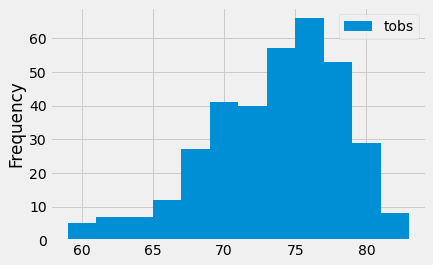

In [89]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
statresponse = session.query(Measure.date, Measure.tobs).order_by(Measure.date).filter(Measure.date >= '2016-08-23').\
    filter(Measure.station == 'USC00519281').all()
listoo = []
for row in statresponse:
    listoo.append(row)
stat_df = pd.DataFrame(listoo, columns = ['date', 'tobs'])
stat_df.plot.hist(by= 'tobs', bins = 12)

## Bonus Challenge Assignment

In [91]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measure.tobs), func.avg(Measure.tobs), func.max(Measure.tobs)).\
        filter(Measure.date >= start_date).filter(Measure.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
